**1.Import Library**

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


**Penjelasan:**

Import library yang dibutuhkan:
*   numpy untuk operasi numerik dan pembuatan dataset,
*   tensorflow dan keras untuk membuat dan melatih neural network,
*   matplotlib untuk menampilkan grafik loss saat training.





**2.Membuat Dataset Suhu Celsius ke Fahrenheit**

In [22]:
celsius = np.linspace(-200, 200, 401, dtype=float)
fahrenheit = celsius * 1.8 + 32

**Penjelasan:**

Membuat dataset berupa 401 titik suhu Celsius dari -200 sampai 200.

Kemudian mengonversi suhu Celsius ke Fahrenheit menggunakan rumus fisika **F = 1.8 × C + 32**.

Dataset ini akan digunakan untuk melatih neural network.

**3.Membuat Model Neural Network Sederhana**

In [23]:
model = keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1)
])


**Penjelasan:**

Model NN sangat sederhana:

*   Input satu fitur (suhu Celsius),
*   Output satu neuron (prediksi suhu Fahrenheit).

Model ini mirip regresi linear, belajar mencari bobot dan bias yang tepat.



**4.Kompilasi Model**

In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')


**Penjelasan:**

Model dikompilasi dengan optimizer Adam (learning rate 0.001) dan fungsi loss MSE (Mean Squared Error) yang cocok untuk masalah regresi.

**5.Membuat Callback untuk Print Status Training Setiap 500 Epoch**

In [25]:
class PrintEveryN(tf.keras.callbacks.Callback):
    def __init__(self, n):
        super().__init__()
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0 or (epoch + 1) == self.params['epochs']:
            loss = logs['loss']
            print(f"Epoch {epoch + 1}/{self.params['epochs']} - loss: {loss:.4f}")


**Penjelasan:**

Callback ini akan mencetak loss training setiap 500 epoch.
Jadi kita bisa memantau proses training tanpa harus menampilkan output tiap epoch.

**6.Melatih Model (Training)**

In [26]:
print("Training...")
history = model.fit(celsius, fahrenheit,
                    epochs=6,
                    batch_size=4,
                    verbose=0,
                    callbacks=[PrintEveryN(500)])


Training...
Epoch 500/4000 - loss: 667.0524
Epoch 1000/4000 - loss: 384.2346
Epoch 1500/4000 - loss: 181.2429
Epoch 2000/4000 - loss: 56.5120
Epoch 2500/4000 - loss: 4.5811
Epoch 3000/4000 - loss: 0.0000
Epoch 3500/4000 - loss: 0.0000
Epoch 4000/4000 - loss: 0.0000


**Penjelasan:**

Melatih model selama 5000 epoch dengan dataset yang sudah dibuat.

Output loss training hanya muncul setiap 500 epoch berkat callback.

**7.Menyimpan Model dalam Format .keras**

In [27]:
model.save('model_suhu.keras')
print("\n✅ Model telah disimpan sebagai 'model_suhu.keras' (format Keras terbaru)")



✅ Model telah disimpan sebagai 'model_suhu.keras' (format Keras terbaru)


**Penjelasan:**

Model yang sudah terlatih disimpan dalam file model_suhu.keras agar bisa dipakai ulang tanpa harus melatih ulang dari awal.

**8.Menggunakan Model untuk Prediksi**

In [28]:
print("\nPrediksi suhu:")
test_data = np.array([100, 37, -20, 0, -40], dtype=float)
predictions = model.predict(test_data)

for i, c in enumerate(test_data):
    print(f"{c}°C -> {predictions[i][0]:.2f}°F")



Prediksi suhu:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
100.0°C -> 212.00°F
37.0°C -> 98.60°F
-20.0°C -> -4.00°F
0.0°C -> 32.00°F
-40.0°C -> -40.00°F


**Penjelasan:**

Menguji model dengan beberapa suhu Celsius baru, kemudian menampilkan prediksi suhu Fahrenheit.

**9.Menampilkan Bobot dan Bias Model**

In [29]:
weights = model.get_weights()
print("\nBobot model (weight, bias):", weights)


Bobot model (weight, bias): [array([[1.8000075]], dtype=float32), array([32.000122], dtype=float32)]


**Penjelasan:**

Menampilkan nilai bobot (weight) dan bias yang didapat model setelah training.

Idealnya bobot mendekati 1.8 dan bias mendekati 32 (rumus asli konversi suhu).

**10.Plot Grafik Loss Training**

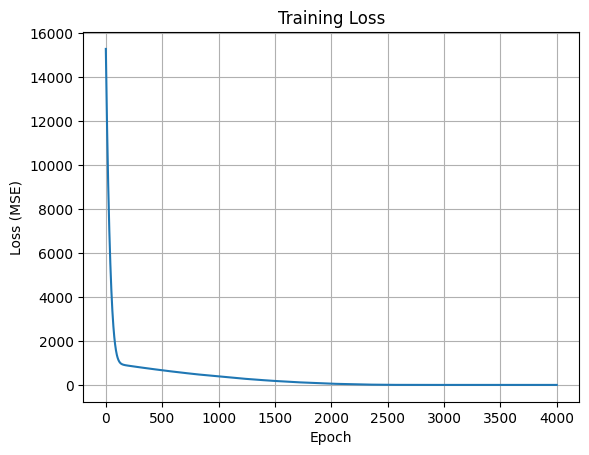

In [30]:
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()


**Penjelasan:**

Menampilkan grafik penurunan loss selama training untuk memastikan model belajar dengan baik dan loss semakin kecil.

# Alat Konversi Suhu Sederhana dengan Python & Neural Network

---

## Penjelasan Singkat

Alat ini adalah program Python sederhana yang menggunakan model Neural Network yang sudah dilatih untuk mengkonversi suhu dari Celsius ke Fahrenheit.

---

## Cara Kerja

1. **Load Model yang Sudah Dilatih**  
   Model neural network yang telah dilatih dan disimpan (dengan bobot dan bias terbaik) akan dimuat ke dalam program.

2. **User Input Manual**  
   Pengguna bisa memasukkan nilai suhu dalam Celsius secara manual.

3. **Prediksi dengan Model**  
   Model akan mengubah input suhu Celsius menjadi suhu Fahrenheit berdasarkan pembelajaran yang sudah didapat saat training.

---

## Fitur Utama

- Menggunakan model neural network yang ringan dan cepat.
- Memungkinkan pengguna melakukan konversi suhu secara manual tanpa perlu melakukan training ulang.
- Akurasi tinggi karena model sudah dilatih dengan dataset luas dan mendekati rumus asli \(F = 1.8 \times C + 32\).

---

## Kesimpulan

Alat ini memudahkan konversi suhu dengan teknologi machine learning yang dibungkus secara sederhana sehingga pengguna yang awam sekalipun bisa menggunakannya langsung.


In [31]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('model_suhu.keras')
print("✅ Model berhasil dimuat dari 'model_suhu.keras'")

user_input = input("Masukkan suhu dalam Celsius (pisahkan dengan koma, contoh: 100,37,-20): ")

try:
    celsius_input = np.array([float(x.strip()) for x in user_input.split(',')])
except ValueError:
    print("❌ Input tidak valid. Pastikan hanya memasukkan angka yang dipisahkan koma.")
    exit()

predictions = model.predict(celsius_input)

print("\nPrediksi suhu:")
for c, f in zip(celsius_input, predictions):
    print(f"{c}°C -> {f[0]:.2f}°F")


✅ Model berhasil dimuat dari 'model_suhu.keras'
Masukkan suhu dalam Celsius (pisahkan dengan koma, contoh: 100,37,-20): 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Prediksi suhu:
100.0°C -> 212.00°F


## Tambahan: Penjelasan Konsep Dasar Neural Network ©3xSiberID

### Apa itu Neuron dalam Neural Network?

Neuron adalah unit dasar dalam jaringan saraf buatan (neural network). Setiap neuron menerima input (dalam kasus ini, suhu Celsius), mengalikan dengan bobot (weight), menambahkan bias, lalu menghasilkan output (prediksi suhu Fahrenheit). Dalam model sederhana ini, hanya ada satu neuron.

---

### Apa itu Weight (Bobot)?

Bobot adalah angka yang menentukan seberapa besar pengaruh sebuah input terhadap output. Dalam kasus konversi suhu, bobot idealnya sekitar 1.8 karena rumus:  
\[
F = 1.8 \times C + 32
\]

---

### Apa itu Bias?

Bias adalah nilai tambahan yang ditambahkan ke hasil perkalian input dan bobot sebelum akhirnya dikeluarkan sebagai output. Bias berfungsi menggeser fungsi output sehingga model bisa memprediksi dengan tepat. Dalam konversi suhu, bias idealnya 32.

---

### Fungsi Loss (Kerugian) dan Kenapa Harus Diminimalkan?

Loss mengukur seberapa jauh prediksi model dari nilai sebenarnya. Di sini menggunakan *Mean Squared Error* (MSE) yang menghitung rata-rata kuadrat selisih antara prediksi dan nilai asli. Tujuan training adalah meminimalkan loss agar model makin akurat.

---

### Apa itu Epoch?

Epoch adalah satu kali iterasi lengkap dari seluruh dataset selama proses training. Misalnya, kalau kamu punya 401 data suhu, 1 epoch berarti model sudah “melihat” dan belajar dari semua data tersebut sekali.

---

### Apa itu Optimizer?

Optimizer adalah algoritma yang mengatur bagaimana bobot dan bias diupdate selama training untuk meminimalkan loss. Di sini kita pakai **Adam**, optimizer yang populer dan efektif, yang menggabungkan ide dari beberapa optimizer lain.

---

### Kenapa Model Ini Bisa Belajar?

Model belajar dengan mengubah bobot dan bias secara bertahap (berdasarkan loss) agar prediksi semakin mendekati nilai asli (rumus fisika suhu). Jadi walaupun kita tidak memberitahu langsung bobot = 1.8 dan bias = 32, model “menemukan” nilai tersebut lewat proses training.
